In [76]:
import pandas as pd

# Dateien laden
momondo = pd.read_csv("../csv/momondo_data.csv")
kayak = pd.read_csv("../csv/kayak_data.csv")
opodo = pd.read_csv("../csv/opodo_data.csv")

# NaN-Werte entfernen
momondo_clean = momondo.dropna(subset=["Preis"])
kayak_clean = kayak.dropna(subset=["Preis"])
opodo_clean = opodo.dropna(subset=["Preis"])

print(f"Saubere Momondo-Einträge: {len(momondo_clean)}")
print(f"Saubere Kayak-Einträge:   {len(kayak_clean)}")
print(f"Saubere Kayak-Einträge:   {len(opodo_clean)}")


Saubere Momondo-Einträge: 19274
Saubere Kayak-Einträge:   40029
Saubere Kayak-Einträge:   408


In [77]:
momondo_avg = momondo_clean["Preis"].mean()
kayak_avg = kayak_clean["Preis"].mean()

print(f"Durchschnittspreis Momondo: {momondo_avg:.2f} €")
print(f"Durchschnittspreis Kayak:   {kayak_avg:.2f} €")


Durchschnittspreis Momondo: 196.78 €
Durchschnittspreis Kayak:   197.99 €


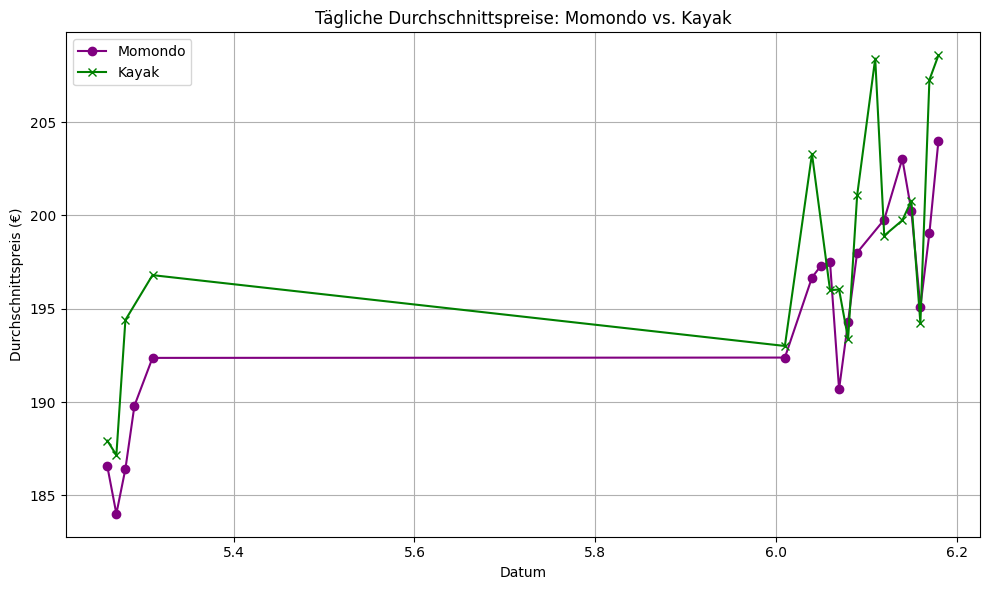

Korrelation (r): 0.824
p-Wert: 0.000087


In [78]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Durchschnittspreise pro Datum
momondo_daily = momondo_clean.groupby("Datum")["Preis"].mean()
kayak_daily = kayak_clean.groupby("Datum")["Preis"].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(momondo_daily.index, momondo_daily.values, marker='o', label="Momondo", color="purple")
plt.plot(kayak_daily.index, kayak_daily.values, marker='x', label="Kayak", color="green")
plt.xlabel("Datum")
plt.ylabel("Durchschnittspreis (€)")
plt.title("Tägliche Durchschnittspreise: Momondo vs. Kayak")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation berechnen (nur gemeinsame Tage)
common_dates = sorted(set(momondo_daily.index).intersection(set(kayak_daily.index)))
momondo_vals = momondo_daily.loc[common_dates].values
kayak_vals = kayak_daily.loc[common_dates].values

correlation, p_value = pearsonr(momondo_vals, kayak_vals)

# Ergebnis ausgeben
print(f"Korrelation (r): {correlation:.3f}")
print(f"p-Wert: {p_value:.6f}")

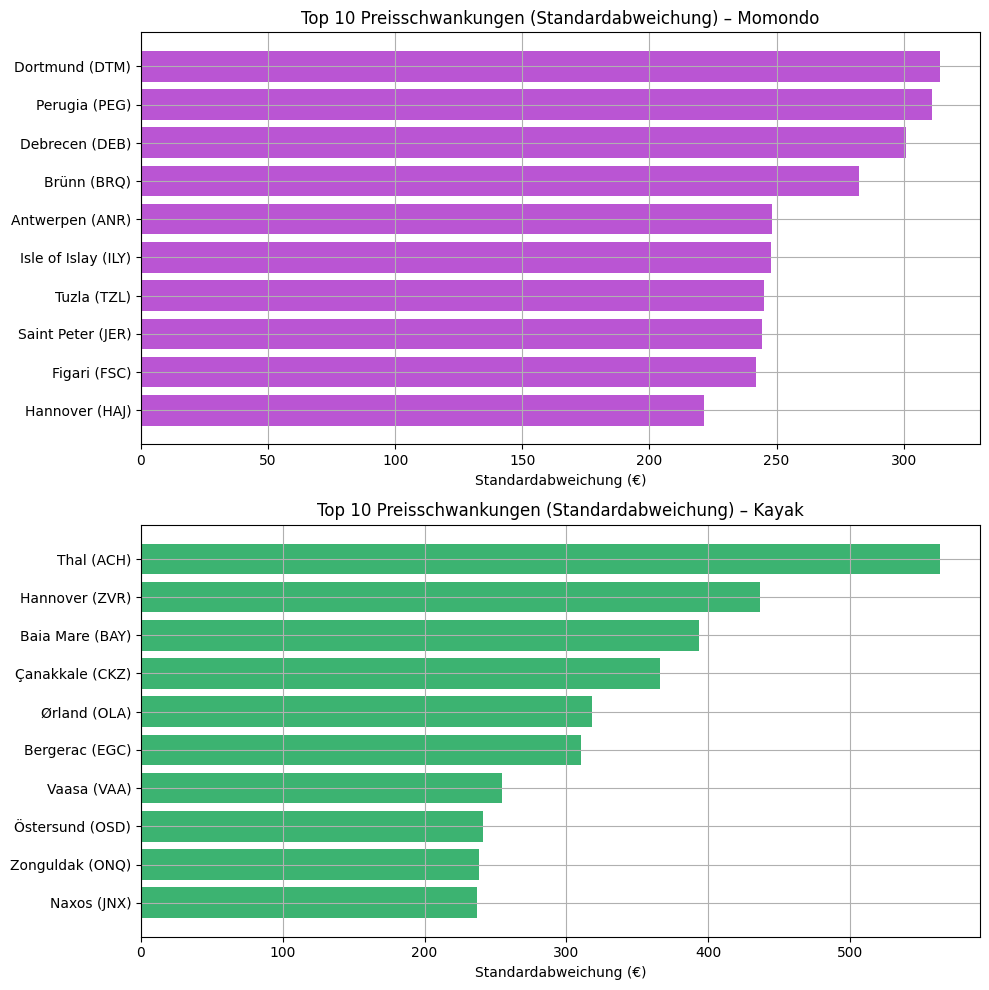

In [79]:
import matplotlib.pyplot as plt

# Top 10 Standardabweichungen je Anbieter
std_momondo = momondo_clean.groupby("Stadt")["Preis"].std().sort_values(ascending=False).head(10)
std_kayak = kayak_clean.groupby("Stadt")["Preis"].std().sort_values(ascending=False).head(10)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Momondo
axes[0].barh(std_momondo.index[::-1], std_momondo.values[::-1], color="mediumorchid")
axes[0].set_title("Top 10 Preisschwankungen (Standardabweichung) – Momondo")
axes[0].set_xlabel("Standardabweichung (€)")
axes[0].grid(True)

# Kayak
axes[1].barh(std_kayak.index[::-1], std_kayak.values[::-1], color="mediumseagreen")
axes[1].set_title("Top 10 Preisschwankungen (Standardabweichung) – Kayak")
axes[1].set_xlabel("Standardabweichung (€)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


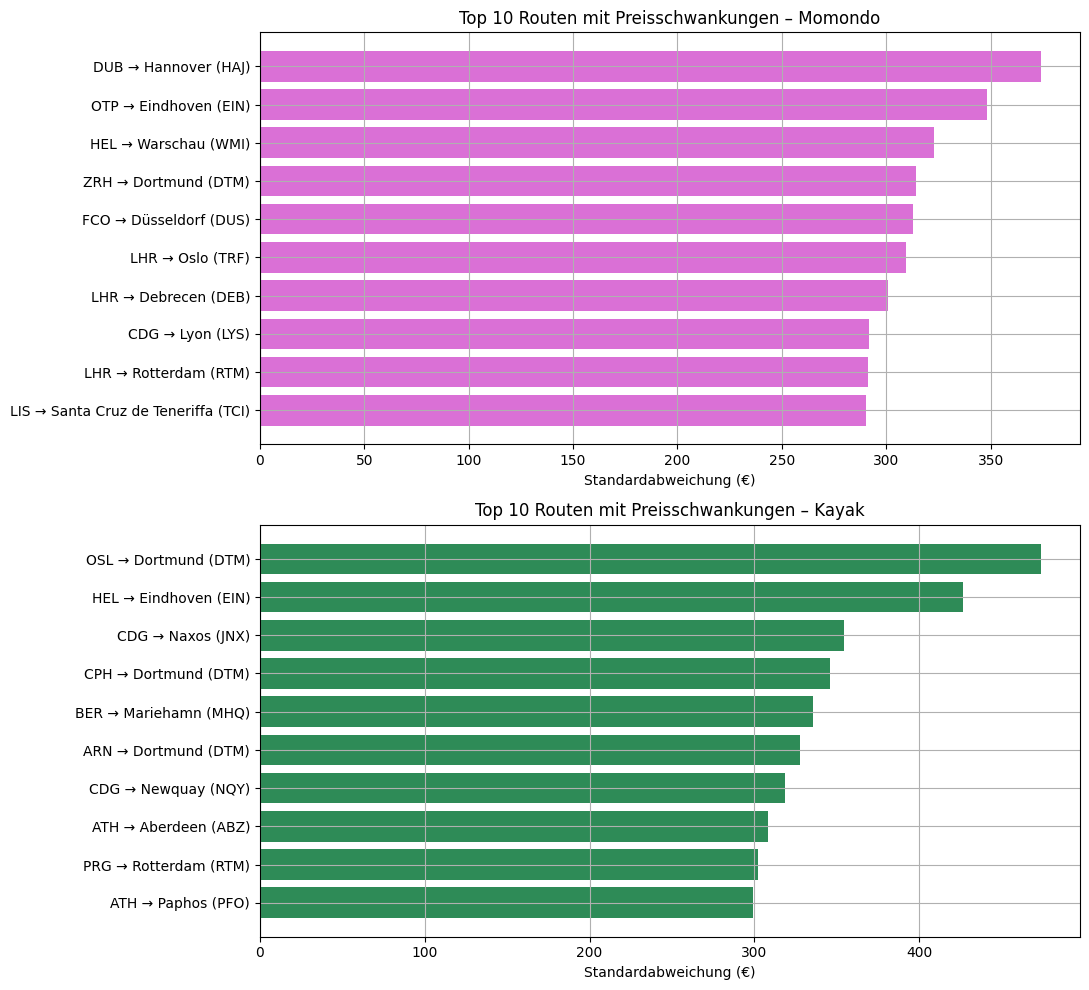

In [80]:

import matplotlib.pyplot as plt

momondo_clean = momondo_clean.copy()
kayak_clean = kayak_clean.copy()

momondo_clean["Route"] = momondo_clean["Abflug_Flughafen"] + " → " + momondo_clean["Stadt"]
kayak_clean["Route"] = kayak_clean["Abflug_Flughafen"] + " → " + kayak_clean["Stadt"]

# Top 10 schwankendste Routen nach Standardabweichung
std_momondo_routes = momondo_clean.groupby("Route")["Preis"].std().sort_values(ascending=False).head(10)
std_kayak_routes = kayak_clean.groupby("Route")["Preis"].std().sort_values(ascending=False).head(10)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(11, 10))

# Momondo
axes[0].barh(std_momondo_routes.index[::-1], std_momondo_routes.values[::-1], color="orchid")
axes[0].set_title("Top 10 Routen mit Preisschwankungen – Momondo")
axes[0].set_xlabel("Standardabweichung (€)")
axes[0].grid(True)

# Kayak
axes[1].barh(std_kayak_routes.index[::-1], std_kayak_routes.values[::-1], color="seagreen")
axes[1].set_title("Top 10 Routen mit Preisschwankungen – Kayak")
axes[1].set_xlabel("Standardabweichung (€)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

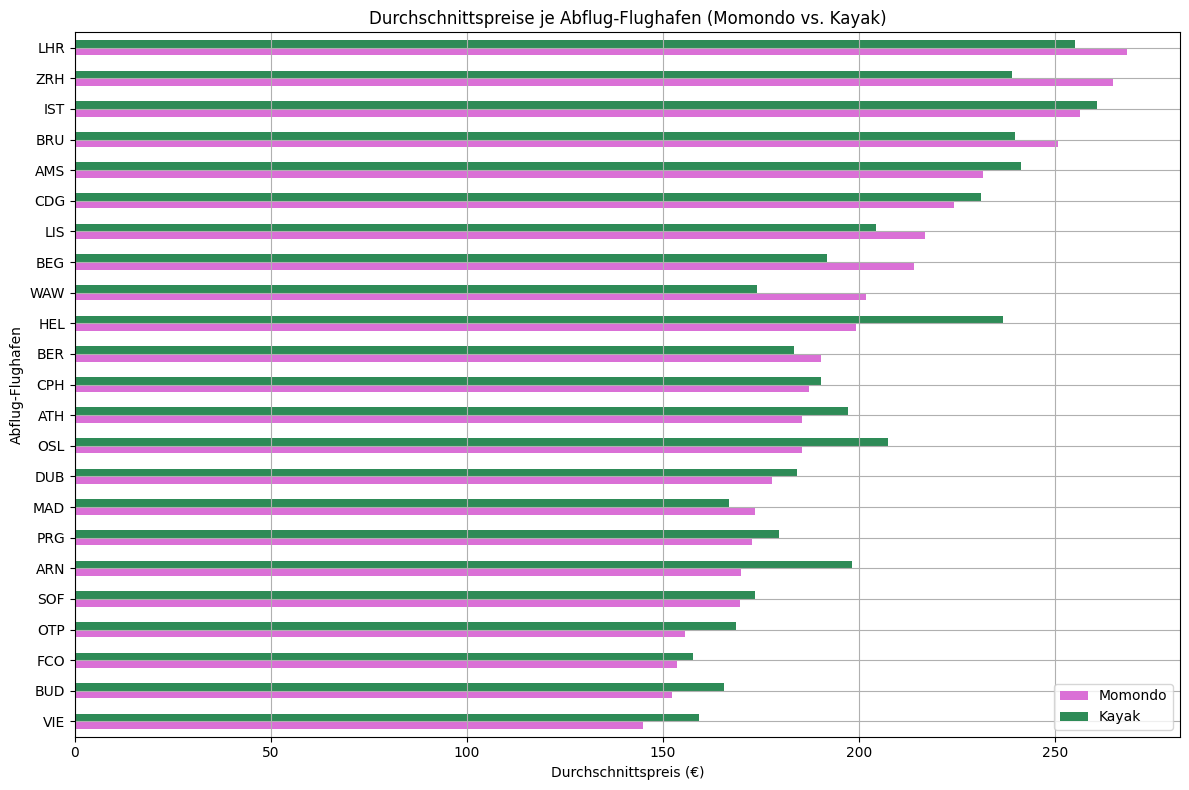

In [81]:
import matplotlib.pyplot as plt

# Durchschnittspreise je Abflug-Flughafen
avg_momondo = momondo_clean.groupby("Abflug_Flughafen")["Preis"].mean().sort_values()
avg_kayak = kayak_clean.groupby("Abflug_Flughafen")["Preis"].mean().sort_values()

# Gemeinsame Flughäfen extrahieren
common_airports = avg_momondo.index.intersection(avg_kayak.index)

# Daten kombinieren
df_avg = pd.DataFrame({
    "Momondo": avg_momondo.loc[common_airports],
    "Kayak": avg_kayak.loc[common_airports]
})

# Sortieren nach Momondo-Durchschnitt
df_avg = df_avg.sort_values("Momondo")

# Plot
plt.figure(figsize=(12, 8))
df_avg.plot(kind="barh", figsize=(12, 8), color=["orchid", "seagreen"])
plt.xlabel("Durchschnittspreis (€)")
plt.ylabel("Abflug-Flughafen")
plt.title("Durchschnittspreise je Abflug-Flughafen (Momondo vs. Kayak)")
plt.grid(True)
plt.tight_layout()
plt.show()


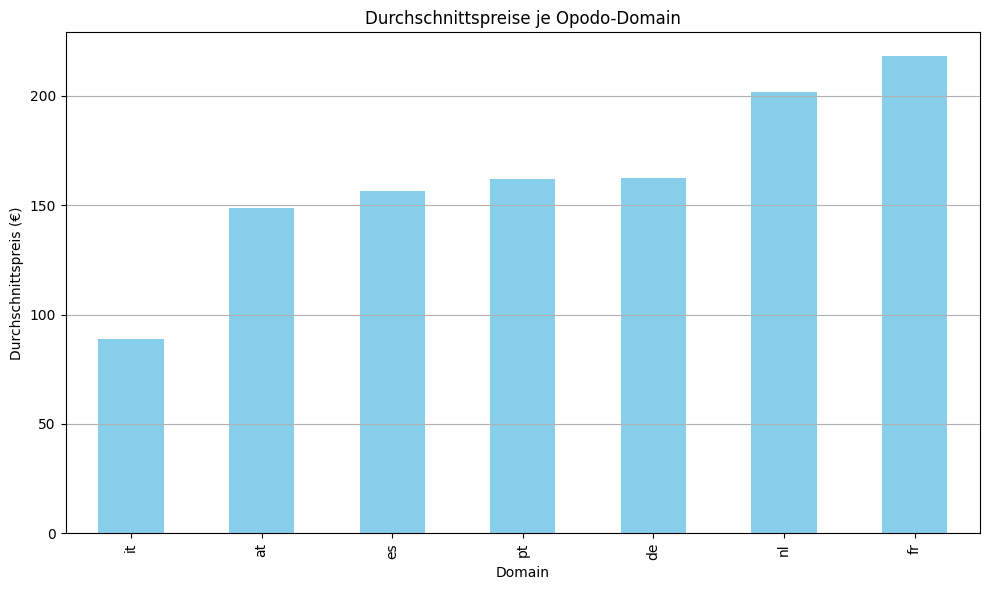

F-Statistik: 16.00
p-Wert: 0.00000


In [82]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Durchschnittspreise pro Domain
domain_avg = opodo_clean.groupby("Domain")["Preis"].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
domain_avg.plot(kind="bar", color="skyblue")
plt.ylabel("Durchschnittspreis (€)")
plt.title("Durchschnittspreise je Opodo-Domain")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# Ausgabe der Werte
domain_avg.reset_index()

gruppen = [group["Preis"].values for _, group in opodo_clean.groupby("Domain")]

# ANOVA
f_stat, p_value = f_oneway(*gruppen)

# Ergebnis
print(f"F-Statistik: {f_stat:.2f}")
print(f"p-Wert: {p_value:.5f}")

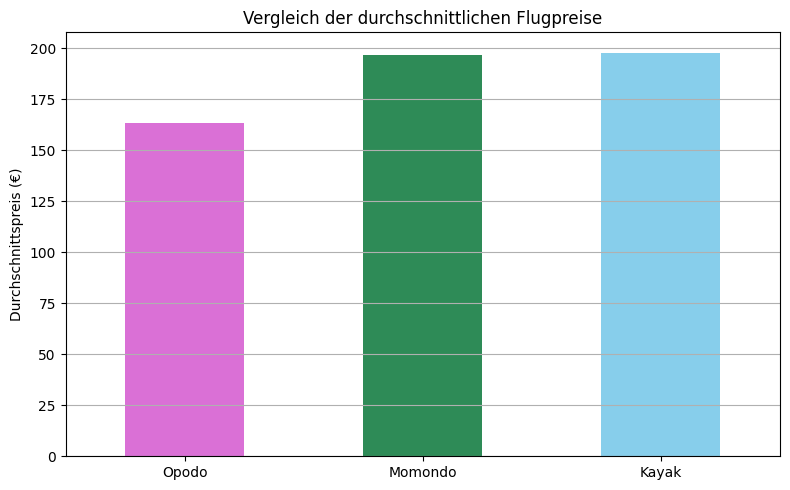

         Durchschnittspreis (€)
Opodo                163.264706
Momondo              196.780533
Kayak                197.993105

ANOVA-Test: F = 18.51, p-Wert = 0.00000


In [83]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import pandas as pd

# Durchschnittspreise berechnen
avg_prices = {
    "Momondo": momondo_clean["Preis"].mean(),
    "Kayak": kayak_clean["Preis"].mean(),
    "Opodo": opodo_clean["Preis"].mean()
}

df_avg = pd.DataFrame.from_dict(avg_prices, orient="index", columns=["Durchschnittspreis (€)"])
df_avg = df_avg.sort_values("Durchschnittspreis (€)")

# Plot
plt.figure(figsize=(8, 5))
df_avg["Durchschnittspreis (€)"].plot(kind="bar", color=["orchid", "seagreen", "skyblue"])
plt.ylabel("Durchschnittspreis (€)")
plt.title("Vergleich der durchschnittlichen Flugpreise")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# ANOVA-Test
f_stat, p_value = f_oneway(
    momondo_clean["Preis"].values,
    kayak_clean["Preis"].values,
    opodo_clean["Preis"].values
)

# Ausgabe der Tabelle und des p-Werts
print(df_avg)
print(f"\nANOVA-Test: F = {f_stat:.2f}, p-Wert = {p_value:.5f}")